In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [6]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

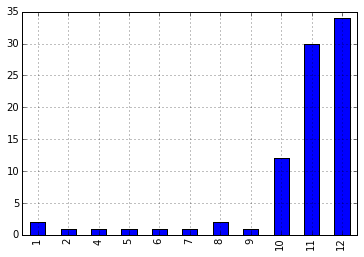

In [10]:
r = release_dates
r = r[r.title.str.contains('Christmas')]
r = r[r.country == 'USA']
r.groupby(r.date.dt.month).size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

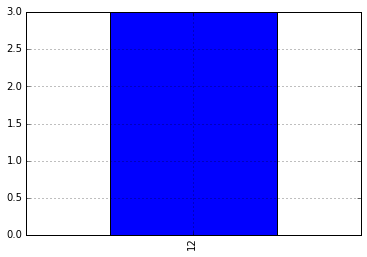

In [11]:
r = release_dates
r = r[r.title.str.startswith('The Hobbit')]
r = r[r.country == 'USA']
r.groupby(r.date.dt.month).size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

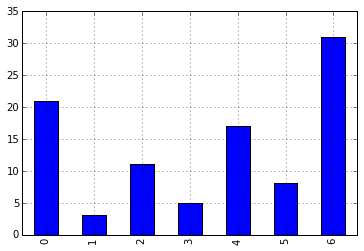

In [12]:
r = release_dates
r = r[r.title.str.contains('Romance')]
r = r[r.country == 'USA']
r.groupby(r.date.dt.dayofweek).size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

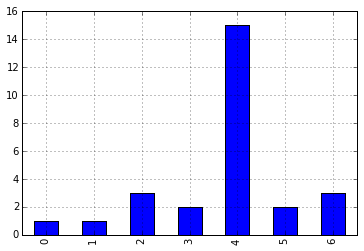

In [13]:
r = release_dates
r = r[r.title.str.contains('Action')]
r = r[r.country == 'USA']
r.groupby(r.date.dt.dayofweek).size().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [22]:
r = release_dates
c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year //10*10 == 1990]
ans = c.merge(release_dates)
ans[ans.country == 'USA'].sort('date')

,title,year,name,type,character,n,country,date
1,GoldenEye,1995,Judi Dench,actress,M,6,USA,1995-11-17
70,Jack & Sarah,1995,Judi Dench,actress,Margaret,3,USA,1996-03-22
40,Hamlet,1996,Judi Dench,actress,Hecuba,12,USA,1996-12-25
75,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1,USA,1997-07-18
243,Tomorrow Never Dies,1997,Judi Dench,actress,M,9,USA,1997-12-19
99,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12,USA,1999-01-08
145,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2,USA,1999-05-14
170,The World Is Not Enough,1999,Judi Dench,actress,M,6,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

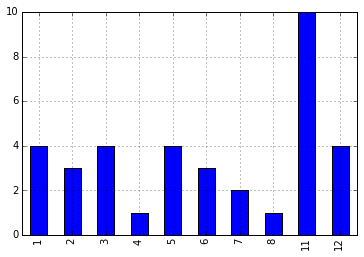

In [24]:
r = release_dates
c = cast
c = c[c.name == 'Judi Dench']
ans = c.merge(release_dates)
ans = ans[ans.country == 'USA'].sort('date')
ans.groupby(ans.date.dt.month).size().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

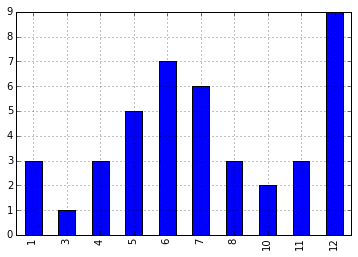

In [30]:
c = cast
r = release_dates
r = r[r.country == 'USA']
c = c[c.name == 'Tom Cruise']
ans = c.merge(r)
ans.date.dt.month.value_counts().sort_index().plot(kind='bar')

#extra stuff 

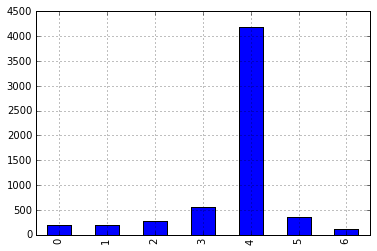

In [42]:
r = release_dates
c = cast
r = r[r.country == 'India']
r = r[r.date.dt.year >= 2000]
r.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

In [8]:
c = cast
r = release_dates
r = r[r.country == 'India']
full = r.merge(cast)
full

,title,year,country,date,name,type,character,n
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Ramesh Bhat,actor,Kashinath,6
1,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Deepu (III),actor,Arun,8
2,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Master Hirannayya,actor,Kailasanathayya,4
3,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Komal (III),actor,Vishwanth aka Gandharva,7
4,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Srinivasa Murthy,actor,Ramanath,5
5,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Rohit (XVII),actor,Chintu,12
6,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Arun Sagar,actor,Guruji,9
7,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Shivarajkumar,actor,Himself - Narrator,NaN
8,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Sudeep,actor,Raghu,1
9,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Vishnuvardhan,actor,Himself - Guest Appearance,NaN


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


/home/makala/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


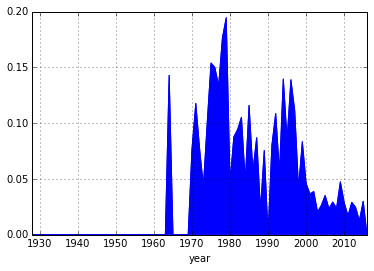

In [9]:
%reset_selective temp
temp = full[full.n == 1]
temp['iskhan'] = temp.name.str.lower().str.contains(r'kapoor$')
temp = temp.drop_duplicates(['title','iskhan'])
# # temp['iskhan'] = (temp[temp.title == temp['title']]).name.str.lower().str.contains(r'khan\b')
# # (r'.khan\b') in list(temp[temp.title == 'Chalte Chalte'].name.str.lower())

ans = temp[['title','year','n','iskhan']]
ans1 = ans.groupby(['year','iskhan']).size().unstack().fillna(0)
(ans1[True]/(ans1[True]+ans1[False])).plot(kind = 'area')

###the share of lead actors with the name 'khan' in them in all the movies released in india over the years

In [170]:
c = cast
r = release_dates
india = r[r.country == 'India']
usa = r[r.country == 'UK']
test = usa.merge(c) 
test = test[~test.name.str.lower().str.contains('asdadad')]
test [test.name == 'Amitabh Bachchan'].name.str.lower().str.contains('khan')

13502     False
13579     False
18412     False
18502     False
35954     False
38318     False
47828     False
47844     False
50638     False
56641     False
57276     False
64536     False
75459     False
94693     False
99434     False
101978    False
104523    False
116772    False
120380    False
127023    False
151509    False
176114    False
186331    False
195291    False
195292    False
196018    False
200790    False
200864    False
200954    False
202821    False
203019    False
207982    False
208554    False
213603    False
213981    False
235246    False
237492    False
254432    False
275241    False
280946    False
281362    False
283185    False
301183    False
301313    False
315026    False
319853    False
320023    False
328623    False
328624    False
337227    False
357991    False
399148    False
480498    False
485209    False
Name: name, Length: 54, dtype: bool